In [1]:
# Load packages
import matplotlib.pyplot as plt
import numpy as np
import pickle

from FDApy.preprocessing.dim_reduction.fpca import MFPCA
from FDApy.representation.functional_data import MultivariateFunctionalData
from FDApy.clustering.fcubt import Node, FCUBT

from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
# Load data
with open('./data/scenario_2_smooth.pkl', 'rb') as f:
    data_fd = pickle.load(f)
with open('./data/labels.pkl', 'rb') as f:
    labels = pickle.load(f)

In [3]:
# Split data into train/test set
x = np.arange(data_fd.n_obs)
np.random.shuffle(x)

data_shuffle = [data[x] for data in data_fd]
labels_shuffle = labels[x]
new_data = MultivariateFunctionalData(data_shuffle)

pct = 0.33
s = int(np.ceil((1 - pct) * new_data.n_obs))
train = MultivariateFunctionalData([data[:s] for data in new_data])
test = MultivariateFunctionalData([data[s:] for data in new_data])
labels_train = labels_shuffle[:s]
labels_test = labels_shuffle[s:]

## fCUBT clustering

In [4]:
# Initialization of the tree
root_node = Node(train, is_root=True)
fcubt = FCUBT(root_node=root_node)

In [5]:
# Fit the tree
fcubt.grow(n_components=[0.95, 0.95])
fcubt.join(n_components=[0.95, 0.95])

## Prediction on the test set

In [6]:
# Perform the prediction on the test set
pred_test = fcubt.predict(test, step='join')

In [7]:
res = []
for idx in range(1, len(pred_test) + 1):
    res.append(adjusted_rand_score(labels_test[:idx], pred_test[:idx]))

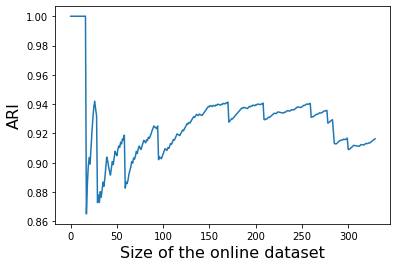

In [8]:
# Plot the results
plt.plot(res)
plt.ylabel('ARI', size=16)
plt.xlabel('Size of the online dataset', size=16)
_ = plt.show()